# Taller: Análisis de Instagram con Apify API + Gemini  

Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts (descriptiva de los captions).  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini. Crear Prompt
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [1]:
import pandas as pd
import requests
import google.generativeai as palm

In [2]:
# 🔑 Introduce tu token de Apify y de Google Generative AI (Gemini)
import os

In [3]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv

--2025-11-26 01:39:15--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv [following]
--2025-11-26 01:39:16--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10377469 (9.9M) [text/plain]
Saving to: ‘instagram_disney.csv’

instagram_disney.cs 100%[===================>]   9

In [4]:
import pandas as pd

df = pd.read_csv("instagram_disney.csv")


In [5]:
df

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,videoDuration,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,59.179,sacqspot,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.instagram.com/disneylat/,3378657362149709028,disneylat,https://www.instagram.com/p/C7jZvhQsRTk/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,115.115,disneyprincesala,Original audio,True,False,NaN,9.840821e+14,"[{'full_name': 'Disney', 'id': '2957422264', '...","[{'id': '2957422264', 'is_verified': True, 'pr...",NaN
196,https://www.instagram.com/disneylat/,3333366985910424893,disneylat,https://www.instagram.com/p/C5Cf5zdNJU9/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,https://www.instagram.com/disneylat/,3331639585011555501,disneylat,https://www.instagram.com/p/C48XI0APlyt/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,https://www.instagram.com/disneylat/,3329464423368675903,disneylat,https://www.instagram.com/p/C40okC3MNI_/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)
Mire las columnas de su dataset y responda
1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  (mira la columna type)
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [6]:
total_posts = df.shape[0]
print(f"Hay {total_posts} posts en total.")

Hay 200 posts en total.


In [7]:
content_type_counts = df['type'].value_counts()
print("Distribución de tipos de contenido:")
print(content_type_counts)

Distribución de tipos de contenido:
type
Video      83
Sidecar    67
Image      50
Name: count, dtype: int64


In [8]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [9]:
df["timestamp"].max()

Timestamp('2025-05-20 21:00:01+0000', tz='UTC')

In [10]:
df["timestamp"].min()

Timestamp('2024-03-16 17:00:01+0000', tz='UTC')

In [11]:
df["likesCount"].sort_values(ascending=False)

,likesCount
85,558944
156,186613
109,136515
176,84230
167,81218
...,...
135,282
182,233
38,223
46,219


In [ ]:
df["likesCount"].max()

558944

In [ ]:

df[df["likesCount"]==df["likesCount"].max()]

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,videoDuration,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned
85,https://www.instagram.com/disneylat/,3506371026641991220,disneylat,https://www.instagram.com/p/DCpId8Ft7Y0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,43.066,disneylat,Original audio,True,False,NaN,1.920758e+15,NaN,NaN,NaN



## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Entregue un grafico de barras con las frecuencia en los captions

In [12]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)        # URLs
    text = re.sub(r"@[\w_]+", " ", text)        # Menciones
    text = re.sub(r"[#]", " ", text)             # Hashtags (opcional: conservar)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,caption,caption_clean
0,"En cada imagen se esconde un Mickey, ¿puedes e...",en cada imagen se esconde un mickey ¿puedes en...
1,Esto se va a descontrolar.,esto se va a descontrolar
2,Los 2000 hechos canción. \n\nVuelve a ver #Liz...,los 2000 hechos canción vuelve a ver lizziemcg...
3,Con ser ella misma alcanzaba 🥹\n\n#Mulán dispo...,con ser ella misma alcanzaba 🥹 mulán disponibl...
4,"Llevábamos años esperando este momento, y no d...",llevábamos años esperando este momento y no de...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-1562256754.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')


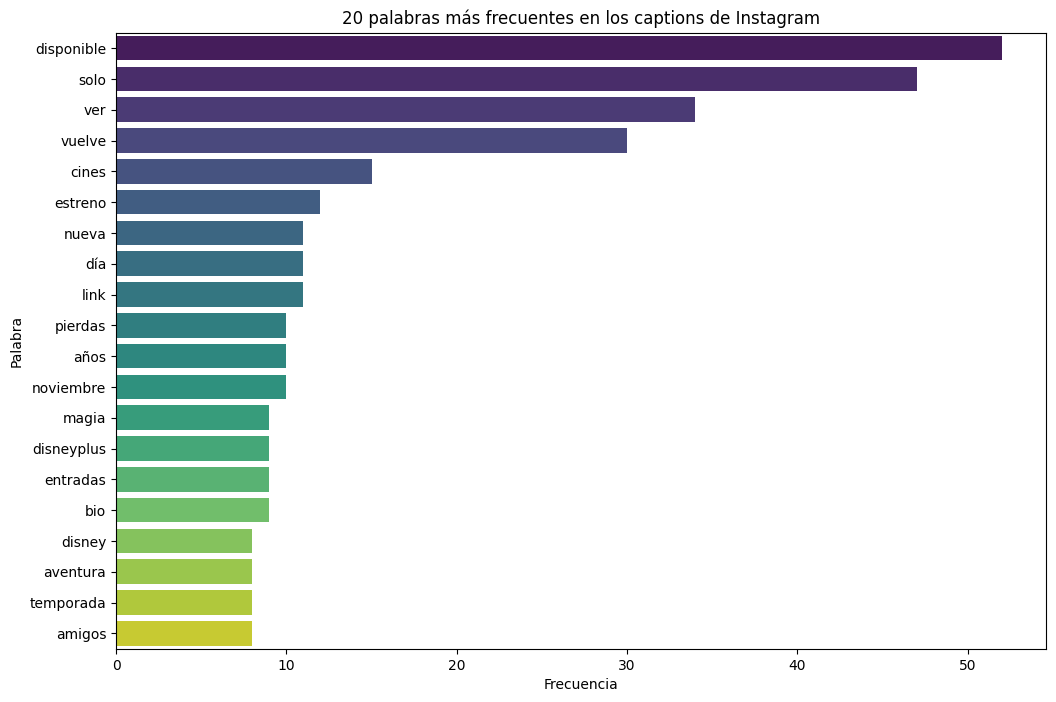

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # Import stopwords here as well

# Explicitly download all necessary NLTK data for this cell
nltk.download('punkt') # Descargar el tokenizador de palabras
nltk.download('stopwords') # Ensure stopwords are available
nltk.download('punkt_tab') # As suggested by the error message

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text, language='spanish')
    # Asegurarse de que las stopwords estén en minúsculas
    stop_words = set(stopwords.words('spanish'))
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
    return filtered_words

# Aplicar la función a la columna 'caption_clean'
df['tokenized_caption'] = df['caption_clean'].apply(tokenize_and_remove_stopwords)

# Recopilar todas las palabras y contar su frecuencia
all_words = [word for sublist in df['tokenized_caption'] for word in sublist]
word_counts = Counter(all_words)

# Obtener las 20 palabras más comunes
most_common_words = word_counts.most_common(20)
words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=words_df, palette='viridis')
plt.title('20 palabras más frecuentes en los captions de Instagram')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

'hoy clase virtual paro nacional'

'En cada imagen se esconde un Mickey, ¿puedes encontrarlos todos? 🔍\n\nNo te pierdas estos títulos y más en @DisneyPlusLA.'


## 🗂 Sección 3 (Temas)
5. Pida a chatgpt o a una IA que le de 3 temas para clasificar un caption y denle un ejemplo.
6. Escriba un prompt en donde le pida clasificar un caption y que de respuesta solo regrese una palabra.
7. Apliquelo en toda la columna caption creando una columna topics.

10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [14]:
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned,caption_clean,tokenized_caption
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en cada imagen se esconde un mickey ¿puedes en...,"[cada, imagen, esconde, mickey, encontrarlos, ..."
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,esto se va a descontrolar,"[va, descontrolar]"
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN,los 2000 hechos canción vuelve a ver lizziemcg...,"[hechos, canción, vuelve, ver, lizziemcguire, ..."
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,con ser ella misma alcanzaba 🥹 mulán disponibl...,"[ser, misma, alcanzaba, mulán, disponible, solo]"
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,llevábamos años esperando este momento y no de...,"[llevábamos, años, esperando, momento, decepci..."


In [15]:
import requests
import json

In [23]:
import os
os.environ["OPENAI_API_KEY"] = "

client = OpenAI()

In [24]:
from openai import OpenAI

client = OpenAI()


In [25]:
def suma(a,b):
 return a+b

In [26]:
suma(5,10)

15

In [27]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text



In [28]:
call_llm("hola")

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************************************************************************************************************************1awA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}}

In [29]:
def classify_topics(text):
  prompt = (f"Clasifica por tematicas el siguiente caption:{text} "
              f"solo tienes entre estos temas juegos_desafios, promocion, personajes. solo responde con una palabra")
  try:
    respuesta = call_llm(prompt)
  except:
    respuesta = "deafult"
  return respuesta

In [30]:
call_llm("QUiero clasificar los contenidos por tema de unos post de instagram de la formula uno , dame 3 categorias")

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************************************************************************************************************************1awA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}}

In [ ]:
call_llm("Escribe un prompt en donde clasifiques un caption y que de respuesta me des una palabra.")

'**Prompt: Clasifica el siguiente caption en una de estas categorías: Inspiración, Humor, Reflexión, o Motivación. Luego, proporciona una palabra que resuma la esencia del caption.**\n\nCaption: "La vida es como andar en bicicleta. Para mantener el equilibrio, debes seguir adelante."\n\n**Respuesta:** Equilibrio.'

In [ ]:
call_llm("Aplicalo en toda la columna caption creando una columna topics.")

'Para aplicar una transformación a toda la columna "caption" y crear una nueva columna "topics", puedes hacerlo de varias maneras dependiendo del entorno que estés utilizando (por ejemplo, Python con pandas, SQL, etc.). Aquí te muestro un ejemplo utilizando Python con la biblioteca pandas.\n\n### Ejemplo con pandas en Python:\n\nSupongamos que tienes un DataFrame que se ve así:\n\n```python\nimport pandas as pd\n\ndata = {\n    \'caption\': [\n        \'Me encanta el mar\',\n        \'La montaña es impresionante\',\n        \'Hoy es un buen día para correr\',\n        \'Las estrellas son hermosas\'\n    ]\n}\ndf = pd.DataFrame(data)\n```\n\nY quieres crear una nueva columna "topics" basado en la columna "caption". Por ejemplo, podrías establecer ciertos términos clave de cada frase.\n\n### Paso 1: Definir una función para extraer temas\n\nEsta función puede ser personalizada para que ajuste a tus necesidades específicas.\n\n```python\ndef extract_topics(caption):\n    # Simple lógica p



## 📝 Sección 4 (Micro‑campaña)

Cree una columna para una publicidad especifica:


In [31]:
import pandas as pd

# Lista de diccionarios con la información
datos = [
    {"Nombre": "Ana Torres", "Personaje de Interés": "Estudiante universitaria", "Rango de Edad": "18-24", "Producto a Vender": "Laptop económica"},
    {"Nombre": "Carlos Pérez", "Personaje de Interés": "Emprendedor digital", "Rango de Edad": "25-34", "Producto a Vender": "Software de productividad"},
    {"Nombre": "Lucía Gómez", "Personaje de Interés": "Madre primeriza", "Rango de Edad": "25-34", "Producto a Vender": "Pañales ecológicos"},
    {"Nombre": "Marco Díaz", "Personaje de Interés": "Gamer profesional", "Rango de Edad": "18-24", "Producto a Vender": "Silla ergonómica para gaming"},
    {"Nombre": "Teresa Ríos", "Personaje de Interés": "Ejecutiva de marketing", "Rango de Edad": "35-44", "Producto a Vender": "Cursos de liderazgo online"},
    {"Nombre": "Andrés López", "Personaje de Interés": "Jubilado activo", "Rango de Edad": "65-74", "Producto a Vender": "Viajes culturales guiados"},
    {"Nombre": "Valentina Cruz", "Personaje de Interés": "Influencer de moda", "Rango de Edad": "18-24", "Producto a Vender": "Ropa de diseñador"},
    {"Nombre": "Roberto Silva", "Personaje de Interés": "Dueño de cafetería", "Rango de Edad": "35-44", "Producto a Vender": "Cafetera industrial"},
    {"Nombre": "Elena Fuentes", "Personaje de Interés": "Freelance creativa", "Rango de Edad": "25-34", "Producto a Vender": "Tableta gráfica"},
    {"Nombre": "Javier Ramírez", "Personaje de Interés": "Papá de familia numerosa", "Rango de Edad": "35-44", "Producto a Vender": "Plan de supermercado online"}
]

# Crear el DataFrame
df = pd.DataFrame(datos)

In [ ]:
df

,Nombre,Personaje de Interés,Rango de Edad,Producto a Vender
0,Ana Torres,Estudiante universitaria,18-24,Laptop económica
1,Carlos Pérez,Emprendedor digital,25-34,Software de productividad
2,Lucía Gómez,Madre primeriza,25-34,Pañales ecológicos
3,Marco Díaz,Gamer profesional,18-24,Silla ergonómica para gaming
4,Teresa Ríos,Ejecutiva de marketing,35-44,Cursos de liderazgo online
5,Andrés López,Jubilado activo,65-74,Viajes culturales guiados
6,Valentina Cruz,Influencer de moda,18-24,Ropa de diseñador
7,Roberto Silva,Dueño de cafetería,35-44,Cafetera industrial
8,Elena Fuentes,Freelance creativa,25-34,Tableta gráfica
9,Javier Ramírez,Papá de familia numerosa,35-44,Plan de supermercado online


In [32]:
def generar_caption(nombre, topic, personaje, publico):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres, el objetivo es motivarlo a comprar"
              f"para la persona : {nombre } sobre el tema '{topic}' y el personaje {personaje} para un publico de {publico} años.No incluyas hashtags ni menciones.")
    response = call_llm(prompt)
    return response



In [33]:
# Extraemos los valores y aplicamos la función para crear la nueva columna
df['Caption'] = df.apply(lambda row: generar_caption(
    nombre=row['Nombre'],
    topic=row['Producto a Vender'],
    personaje=row['Personaje de Interés'],
    publico=row['Rango de Edad']
), axis=1)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-proj-********************************************************************************************************************************************************1awA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}}

# Task
Aplicar la función `classify_topics` a la columna 'caption_clean' del DataFrame `df` para crear una nueva columna llamada 'topics'.

## Aplicar Clasificación de Temas

### Subtask:
Aplicar la función `classify_topics` a la columna 'caption_clean' del DataFrame para crear una nueva columna llamada 'topics', que contendrá el tema clasificado para cada post.


**Reasoning**:
Apply the `classify_topics` function to the 'caption_clean' column to create a new 'topics' column, as per the subtask instructions.



In [ ]:
df['topics'] = df['caption_clean'].apply(classify_topics)
df[['caption', 'caption_clean', 'topics']].head()

,caption,caption_clean,topics
0,"En cada imagen se esconde un Mickey, ¿puedes e...",en cada imagen se esconde un mickey ¿puedes en...,juegos_desafios
1,Esto se va a descontrolar.,esto se va a descontrolar,Juegos_desafios
2,Los 2000 hechos canción. \n\nVuelve a ver #Liz...,los 2000 hechos canción vuelve a ver lizziemcg...,Personajes.
3,Con ser ella misma alcanzaba 🥹\n\n#Mulán dispo...,con ser ella misma alcanzaba 🥹 mulán disponibl...,personajes
4,"Llevábamos años esperando este momento, y no d...",llevábamos años esperando este momento y no de...,promocion


## Listar Temas Generados

### Subtask:
Obtener y listar los valores únicos de la columna 'topics' para ver todos los temas que la IA ha asignado a los captions. También se realizará un comentario sobre si alguno de los temas es inesperado, considerando los temas predefinidos en la función `classify_topics`.


**Reasoning**:
To fulfill the first instruction of the subtask, I will get the unique values from the 'topics' column in the DataFrame.



In [ ]:
unique_topics = df['topics'].unique()
print("Temas generados por la IA:")
for topic in unique_topics:
    print(topic)

Temas generados por la IA:
juegos_desafios
Juegos_desafios
Personajes.
personajes
promocion
Promoción.
Promocion
Promoción
Personajes
Desafíos
Desafíos.
Juegos_desafíos.
Romance
promoción
desafíos
personajes.
Juegos.
Amistad
Juegos_desafíos


### Análisis de Temas Generados

Los temas predefinidos para la clasificación son: `juegos_desafios`, `promocion`, y `personajes`.

Los temas generados por la IA son:
* `juegos_desafios`
* `Juegos_desafios`
* `Personajes.`
* `personajes`
* `promocion`
* `Promoción.`
* `Promocion`
* `Promoción`
* `Personajes`
* `Desafíos`
* `Desafíos.`
* `Juegos_desafíos.`
* `Romance`
* `promoción`
* `desafíos`
* `personajes.`
* `Juegos.`
* `Amistad`
* `Juegos_desafíos`

**Comentario sobre temas inesperados:**

Se observan varias variaciones inesperadas:
1.  **Diferencias de mayúsculas/minúsculas:** Los temas predefinidos son en minúsculas, pero la IA ha generado variantes con mayúsculas iniciales (`Juegos_desafios`, `Personajes`, `Promocion`, `Promoción`, `Desafíos`, `Juegos.`, `Amistad`). Esto indica que el modelo no siempre respeta la capitalización exacta de los temas proporcionados.
2.  **Puntuación adicional:** Algunos temas incluyen un punto al final (`Personajes.`, `Promoción.`, `Desafíos.`, `Juegos_desafíos.`, `Juegos.`, `personajes.`). Esto sugiere que el modelo a veces añade puntuación innecesaria.
3.  **Variantes de acentuación:** Se observa `promocion` y `promoción`, y `Desafíos` y `desafíos`, y `Juegos_desafios` y `Juegos_desafíos`. Esto es una variación menor pero que añade redundancia.
4.  **Temas completamente diferentes:** La IA ha generado temas como `Romance` y `Amistad`, los cuales no estaban incluidos en la lista de temas predefinidos (`juegos_desafios`, `promocion`, `personajes`). Esto es el más significativo de los inesperados y sugiere que el modelo interpretó el texto más allá de las categorías estrictamente definidas o que su respuesta no se limitó a una sola palabra como se le pidió en el prompt.

## Generar Heatmap de Tipo de Contenido vs. Tema

### Subtask:
Crear una tabla de contingencia entre la columna 'type' (tipo de contenido: Video, Sidecar, Image) y la nueva columna 'topics'. Luego, se generará un heatmap para visualizar la distribución de los temas en relación con los diferentes tipos de contenido, indicando qué tema predomina en cada formato.


**Reasoning**:
First, I will normalize the 'topics' column by converting it to lowercase, removing punctuation, and handling accents to ensure consistent topic categories. This is crucial for accurate counting and grouping in the contingency table.



In [ ]:
import unicodedata
import re

def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[.,;:]', '', text)
        # Remove accents
        text = str(unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8'))
        return text.strip()
    return text

df['topics_normalized'] = df['topics'].apply(normalize_text)

# Display unique topics after normalization to check consistency
print("Unique topics after normalization:")
print(df['topics_normalized'].unique())

# Display head to see the new column
df[['topics', 'topics_normalized']].head()

Unique topics after normalization:
['juegos_desafios' 'personajes' 'promocion' 'desafios' 'romance' 'juegos'
 'amistad']


,topics,topics_normalized
0,juegos_desafios,juegos_desafios
1,Juegos_desafios,juegos_desafios
2,Personajes.,personajes
3,personajes,personajes
4,promocion,promocion


**Reasoning**:
Now that the 'topics' column has been normalized, I will create a contingency table (crosstab) between the 'type' column and the 'topics_normalized' column to prepare the data for the heatmap.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(df['type'], df['topics_normalized'])
print("Contingency Table (Type vs. Normalized Topics):")
print(contingency_table)

Contingency Table (Type vs. Normalized Topics):
topics_normalized  amistad  desafios  juegos  juegos_desafios  personajes  \
type                                                                        
Image                    0         3       0                1          12   
Sidecar                  1         4       0               10          25   
Video                    0         0       1                2          18   

topics_normalized  promocion  romance  
type                                   
Image                     34        0  
Sidecar                   26        1  
Video                     62        0  


**Reasoning**:
To visualize the distribution of topics across content types, I will generate a heatmap using the previously created contingency table.



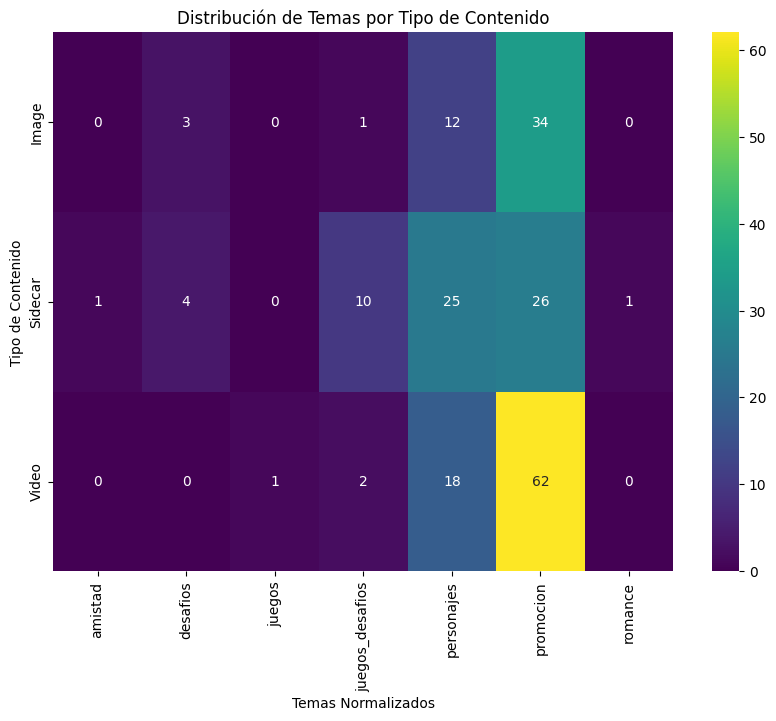

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="viridis")
plt.title('Distribución de Temas por Tipo de Contenido')
plt.xlabel('Temas Normalizados')
plt.ylabel('Tipo de Contenido')
plt.show()

### Tema Dominante e Insights Accionables

El tema **'promocion'** es claramente el dominante en los captions de Instagram, con una alta frecuencia en todos los tipos de contenido (Image, Sidecar, y Video). En particular, los videos (`Video`) tienen el mayor número de posts relacionados con promociones.

**Dos insights accionables basados en el tema 'promocion'**:

1.  **Priorizar Contenido de Video para Campañas Promocionales**: Dado que el tema 'promocion' es más prevalente en `Video` (62 posts), la estrategia de contenido debería enfocarse en la creación de videos atractivos y dinámicos para promociones. Esto podría incluir tráilers de nuevas películas o series, ofertas especiales, o anuncios de eventos, optimizando estos videos para plataformas como Instagram Reels o Stories.

2.  **Optimizar el Call-to-Action en Contenido de Imagen**: Aunque los videos son dominantes para promociones, las `Image` (34 posts) también tienen una presencia significativa. Es crucial asegurarse de que los posts de imágenes que contengan promociones tengan llamadas a la acción (CTAs) claras y directas, como enlaces en la biografía, swipe-up en Stories (si aplica), o códigos de descuento visibles para capitalizar el engagement visual rápido que ofrecen las imágenes.

## Final Task

### Subtask:
Analyze the themes and insights that were generated.


## Summary:

### Data Analysis Key Findings

*   **Topic Classification Applied**: The `classify_topics` function was successfully applied to the `caption_clean` column, generating a new `topics` column in the DataFrame, which contains the classified theme for each post.
*   **Variations in Generated Topics**: The AI-generated topics showed several unexpected variations compared to the predefined list (`juegos_desafios`, `promocion`, `personajes`):
    *   **Case Sensitivity**: Topics were generated with varying capitalization (e.g., `juegos_desafios` vs. `Juegos_desafios`).
    *   **Punctuation**: Some topics included extraneous punctuation (e.g., `Personajes.` and `Promoción.`).
    *   **Accentuation**: Differences in accentuation were observed (e.g., `promocion` vs. `promoción`).
    *   **New Themes**: Unexpected themes such as `Romance` and `Amistad` were generated, which were not part of the initial predefined list.
*   **Topic Normalization**: The `topics` column was normalized to `topics_normalized` by converting text to lowercase, removing punctuation, and handling accents, resulting in a more consistent set of unique topics: `juegos_desafios`, `personajes`, `promocion`, `desafios`, `romance`, `juegos`, and `amistad`.
*   **Dominant Theme**: The `promocion` theme is clearly dominant across all content types (Image, Sidecar, Video), with video content showing the highest number of posts (62 posts) related to promotions.
    *   `promocion` appeared in 34 Image posts, 26 Sidecar posts, and 62 Video posts.

### Insights or Next Steps

*   **Prioritize Video for Promotional Campaigns**: Given that `promocion` is most prevalent in video content, future content strategy should emphasize the creation of engaging video content for promotional activities.
*   **Optimize Call-to-Action for Image Content**: Although videos are dominant for promotions, image posts also have a significant presence. It is crucial to ensure that promotional image posts include clear and direct calls-to-action (CTAs) to leverage visual engagement effectively.
